In [1]:
from array import *
from scipy.integrate import solve_ivp
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib
matplotlib.use("QtAgg")
%matplotlib notebook
plt.rcParams['animation.ffmpeg_path'] ='C:/FFmpeg/bin/ffmpeg'
m1=1
m2=1
l1=1
l2=1
lc1=0.5
lc2=0.5
I1=(m1*l1**2)/12
I2=(m2*l2**2)/12
kp=7
kd=8
ki=0.1
g=9.81
n=1200

In [2]:
def des_path(t):
    #return [0,0,0,0]
    return [np.sin(t),-np.sin(t),np.cos(t),-np.cos(t)]#[q1,q2,dq1,dq2]
t=np.linspace(0,20,n)
q10=np.sin(t)
q20=-np.sin(t)
dq10=np.cos(t)
dq20=-np.cos(t)
#q10=0*t
#q20=0*t
#dq10=0*t
#dq20=0*t

In [3]:

def diffQ(t,Q):
    q1=Q[0]
    q2=Q[1]
    dq1=Q[2]
    dq2=Q[3]
    ddq1=kp*(des_path(t)[0]-q1)+kd*(des_path(t)[2]-dq1)
    ddq2=kp*(des_path(t)[1]-q2)+kd*(des_path(t)[3]-dq2)
    return [dq1,dq2,ddq1,ddq2]

In [4]:
Q0=[0,0,0,0]
x=solve_ivp(diffQ,[0,20],Q0,t_eval=t,max_step=10e-5)
Q1=x.y[0]
Q2=x.y[1]
dQ1=x.y[2]
dQ2=x.y[3]
ddQ1=kp*(q10-Q1)+kd*(dq10-dQ1)
ddQ2=kp*(q20-Q2)+kd*(dq20-dQ2)

In [5]:
d1=np.array([m1*lc1**2+I1+I2+m2*(l1**2+lc2**2)]*n)+m2*2*l1*lc2*np.cos(Q2)
d2=m2*(l1*lc2*np.cos(Q2))+ np.array([m2*lc2**2+I2]*n)
d4=np.array([m2*lc2**2+I2]*n)
D=np.array([[d1,d2],[d2,d4]])
h=-m2*l1*lc2*np.sin(Q2)
C=np.array([[np.multiply(h,dQ2),np.multiply(h,dQ1+dQ2)],[np.multiply(-h,dQ1),[0]*n]])
phi1=(m1*lc1+m2*l1)*g*np.cos(Q1)+m2*lc2*g*np.cos(Q1+Q2)
phi2=m2*lc2*g*np.cos(Q1+Q2)
phi=np.array([[phi1],[phi2]])
dQ=np.array([[dQ1],[dQ2]])
ddQ=np.array([[ddQ1],[ddQ2]])
dQ=dQ.transpose(2,0,1)
ddQ=ddQ.transpose(2,0,1)
D=D.transpose(2,0,1)
C=C.transpose(2,0,1)
phi=phi.transpose(2,0,1)
T=np.matmul(D,ddQ)+np.matmul(C,dQ)+phi
Pw=np.matmul(dQ.transpose(0,2,1),T)
Pw=Pw.squeeze()

#I=np.array([[[I1+I2]*n,[I2]*n],[[I2]*n,[I2]*n]]).transpose(2,0,1)
#J1=np.array([[-lc1*np.sin(Q1),[0]*n],[lc1*np.cos(Q1),[0]*n],[[0]*n,[0]*n]]).transpose(2,0,1)
#J2=np.array([[-l1*np.sin(Q1)-lc2*np.sin(Q1+Q2),-lc2*np.sin(Q1+Q2)],[l1*np.cos(Q1)+lc2*np.cos(Q1+Q2),lc2*np.cos(Q1+Q2)],[[0]*n,[0]*n]]).transpose(2,0,1)
#KE=0.5*np.matmul(np.matmul(dQ.transpose(0,2,1),m1*np.matmul(J1.transpose(0,2,1),J1)+m2*np.matmul(J2.transpose(0,2,1),J2)),dQ)+0.5*np.matmul(np.matmul(dQ.transpose(0,2,1),I),dQ)
KE=0.5*np.matmul(dQ.transpose(0,2,1),np.matmul(D,dQ))
KE=KE.squeeze()
PE=m1*lc1*g*np.sin(Q1)+m2*g*(l1*np.sin(Q1)+lc2*np.sin(Q1+Q2))
E2=KE+PE
E1=integrate.cumtrapz(Pw,t,initial=None)

<IPython.core.display.Javascript object>


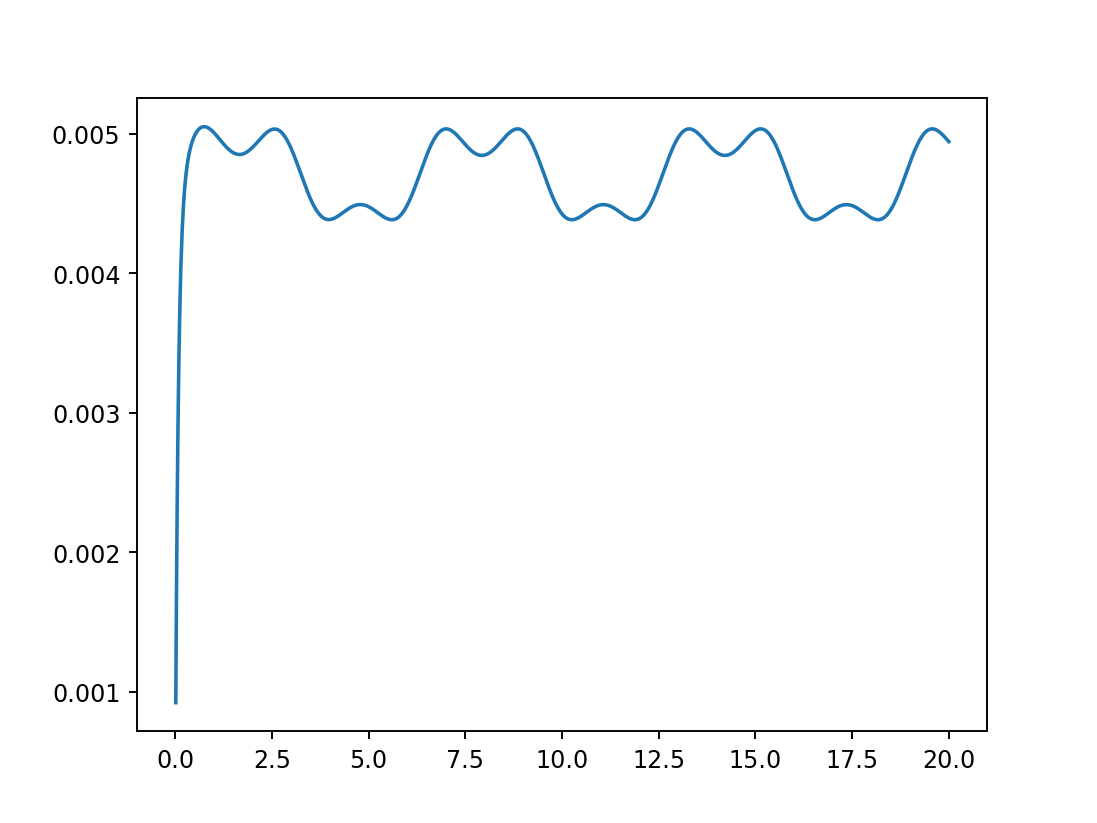

In [6]:
fig2=plt.figure()
plt.plot(t[1:n],E2[1:n]-E1)

<IPython.core.display.Javascript object>


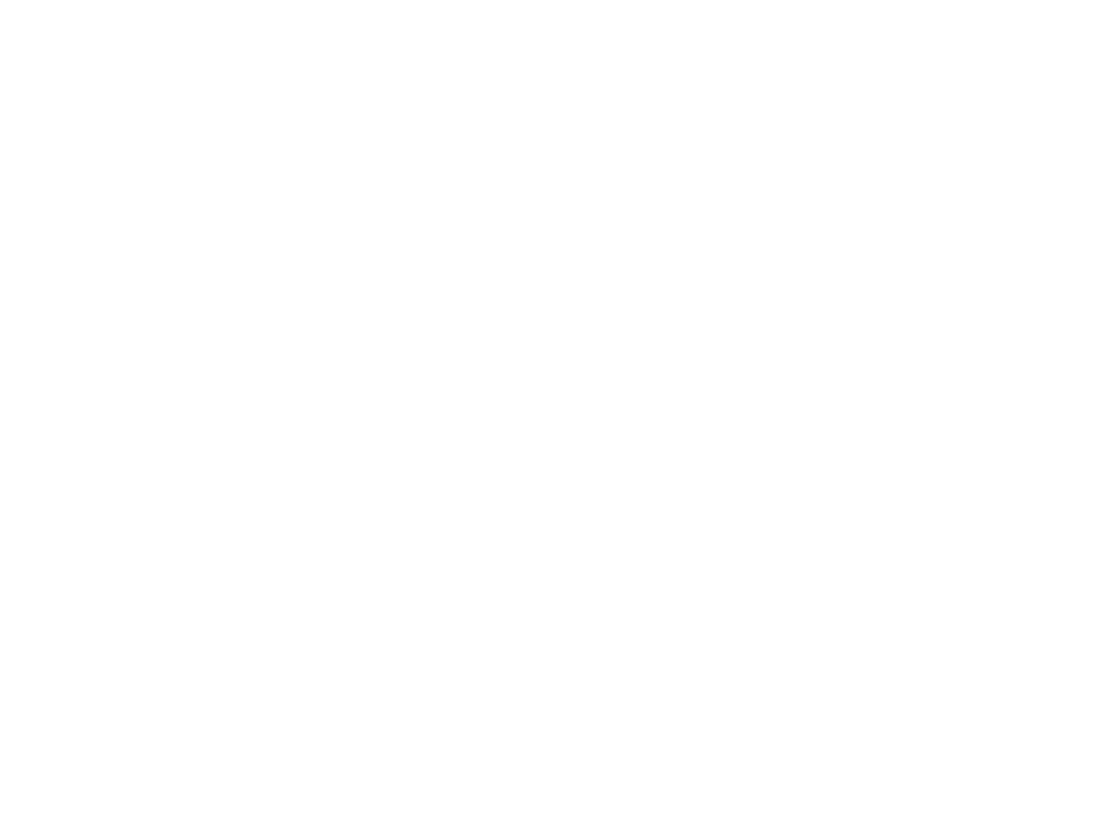

In [7]:
fig = plt.figure()
  
# labeling the x-axis and y-axis
axis = plt.axes(xlim=(-3,3),  ylim=(-3,3))
plt.xlabel("x-distance(m)")
plt.ylabel("y-distance(m)")
# lists storing x and y values
x, y = [], []
  
line, = axis.plot(0, 0)  
line1, = axis.plot(0,0)
line2,= axis.plot(0,0)
def animate(frame_number):
    x=[0,l1*np.cos(Q1[frame_number]),l1*np.cos(Q1[frame_number])+l2*np.cos(Q1[frame_number]+Q2[frame_number])]
    y=[0,l1*np.sin(Q1[frame_number]),l1*np.sin(Q1[frame_number])+l2*np.sin(Q1[frame_number]+Q2[frame_number])]
    x0=[0,l1*np.cos(des_path(t[frame_number])[0]),l1*np.cos(des_path(t[frame_number])[0])+l2*np.cos(des_path(t[frame_number])[0]+des_path(t[frame_number])[1])]
    y0=[0,l1*np.sin(des_path(t[frame_number])[0]),l1*np.sin(des_path(t[frame_number])[0])+l2*np.sin(des_path(t[frame_number])[0]+des_path(t[frame_number])[1])]
    line.set_xdata([0,x[1]])
    line.set_ydata([0,y[1]])
    line1.set_data([x[1],x[2]],[y[1],y[2]])
    line2.set_data(x0,y0)
    line1.set_color('r')
    line2.set_color('g')
    line2.set_linestyle('dashed')
    return line,

In [8]:
anim = animation.FuncAnimation(fig, animate,frames=1200,interval=20)
fig.suptitle('control using PD loop tracking path\n(green is ideal path)', fontsize=14)
# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=60)
anim.save('control.mp4', writer=writervideo)
plt.close()

Traceback (most recent call last):
  File "C:\Users\Ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
  File "C:\Users\Ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\animation.py", line 916, in _stop
    self.event_source.remove_callback(self._step)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


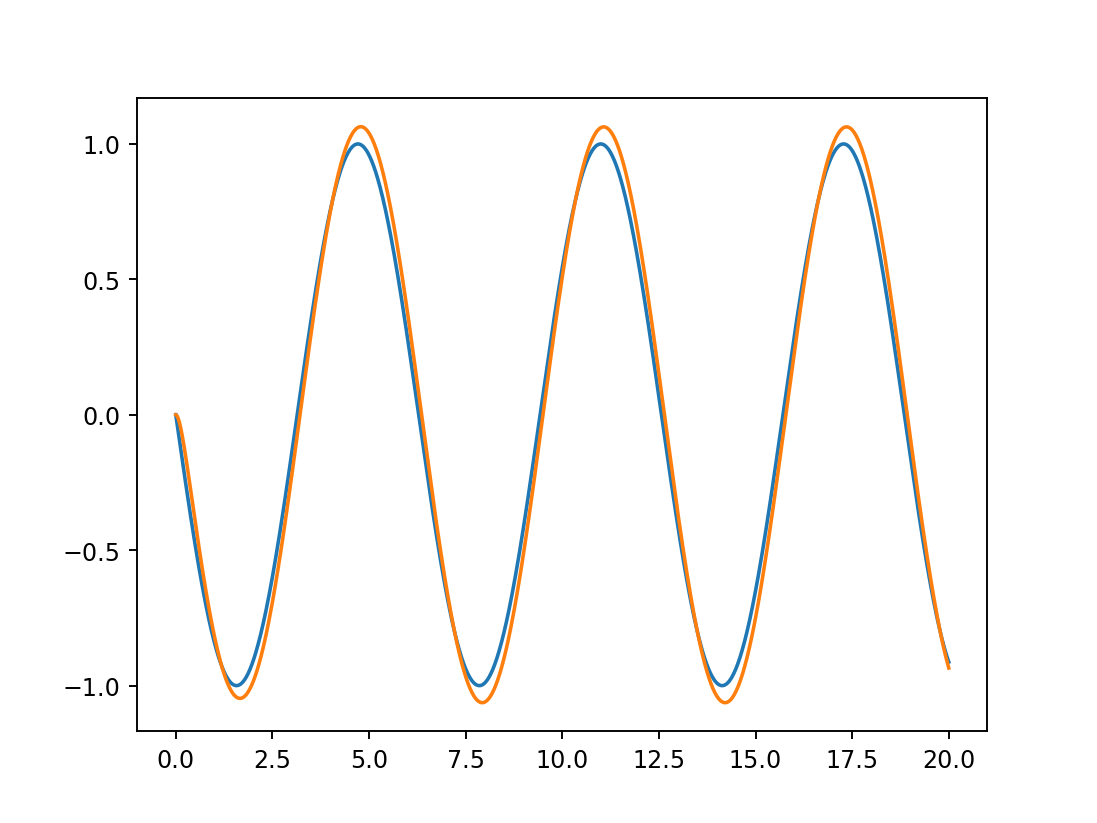

In [9]:
fig1=plt.figure()
plt.plot(t,q20)
plt.plot(t,Q2)

<IPython.core.display.Javascript object>


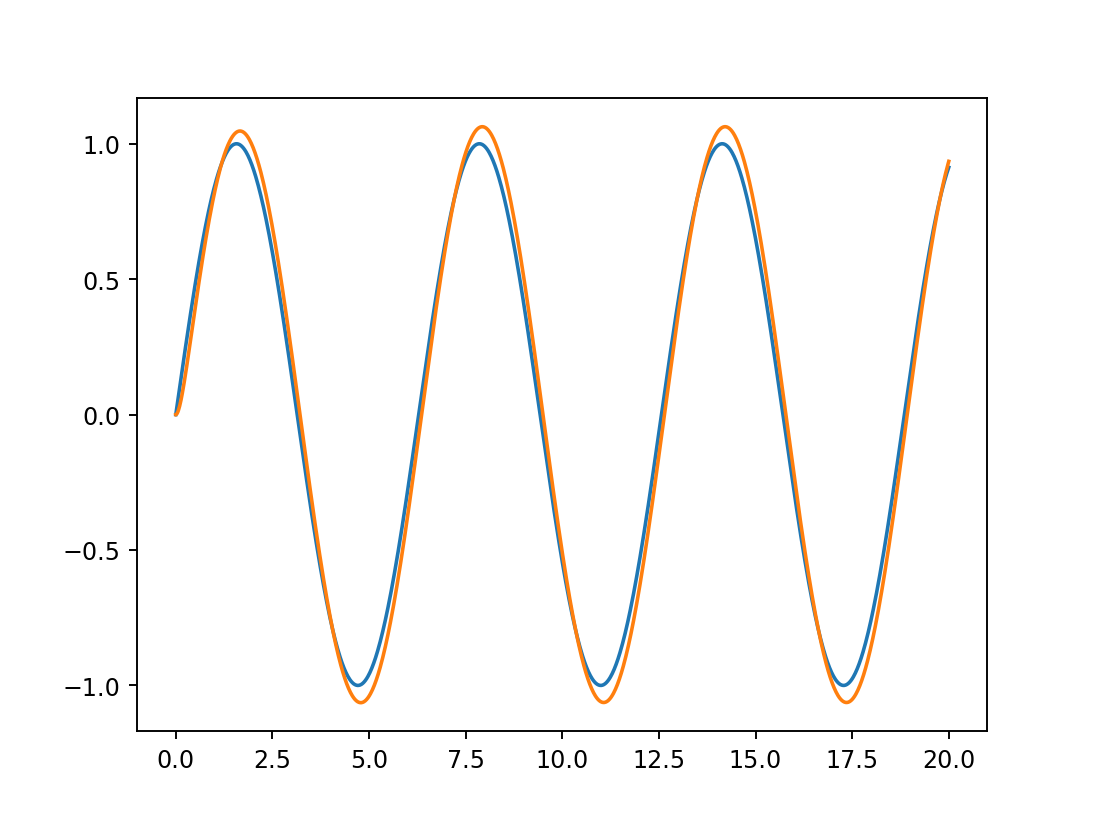

In [10]:
fig2=plt.figure()
plt.plot(t,q10)
plt.plot(t,Q1)